# Imports

In [1]:
import pandas as pd
import mysql.connector

# Conectando banco de dados Sakila com Pandas

In [22]:
mydb = mysql.connector.connect(host="localhost", user="root", password="#SQLiscool1", database='world')

In [23]:
sql = "SELECT * FROM world.country"

In [24]:
mycursor = mydb.cursor()

mycursor.execute(sql)

resultado = mycursor.fetchall()

# Criando um DataFrame

In [5]:
dataFrame_actors = pd.DataFrame(resultado, columns=[coluna[0] for coluna in mycursor.description])

In [6]:
dataFrame_actors

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [7]:
dataFrame_actors.shape

(200, 4)

In [8]:
sql = "SELECT * FROM film"

mycursor.execute(sql)

resultado = mycursor.fetchall()

dataFrame_films = pd.DataFrame(resultado, columns=[coluna[0] for coluna in mycursor.description])

In [9]:
dataFrame_films.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


In [10]:
dataFrame_films.shape

(1000, 13)

# Descrevendo a tabela

In [11]:
dataFrame_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   int64         
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      object        
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   object        
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   object        
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1

In [12]:
dataFrame_films["length"].describe()

count    1000.000000
mean      115.272000
std        40.426332
min        46.000000
25%        80.000000
50%       114.000000
75%       149.250000
max       185.000000
Name: length, dtype: float64

In [13]:
dataFrame_films["rating"].describe()

count      1000
unique        5
top       PG-13
freq        223
Name: rating, dtype: object

# Contando valores

In [14]:
dataFrame_films["rating"].value_counts()

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

In [15]:
dataFrame_actors.first_name.value_counts()

PENELOPE    4
JULIA       4
KENNETH     4
GENE        3
GROUCHO     3
           ..
HENRY       1
DUSTIN      1
JUDE        1
CARMEN      1
THORA       1
Name: first_name, Length: 128, dtype: int64

In [16]:
dataFrame_actors.first_name.value_counts(normalize=True)

PENELOPE    0.020
JULIA       0.020
KENNETH     0.020
GENE        0.015
GROUCHO     0.015
            ...  
HENRY       0.005
DUSTIN      0.005
JUDE        0.005
CARMEN      0.005
THORA       0.005
Name: first_name, Length: 128, dtype: float64

# Histograma

<AxesSubplot:>

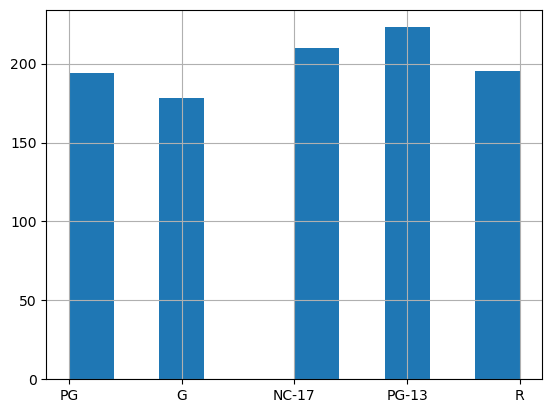

In [17]:
dataFrame_films["rating"].hist()

# Tudo de uma vez só

In [18]:
!pip install pandas-profiling

     ------------------------------------- 324.4/324.4 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 345.9/345.9 kB 22.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.4 MB/s eta 0:00:00
     ------------------------------------- 663.5/663.5 kB 21.1 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 17.9 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.7/4.7 MB 20.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=4647eacf70f6c890e6e9de07de0fbae651880c76c7831dacab3f00d25382f313
  Stored in directory: c:\users\proprietario\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [19]:
from pandas_profiling import ProfileReport

C:\Users\Proprietario\AppData\Local\Temp\ipykernel_22952\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
profile = ProfileReport(dataFrame_films)

In [21]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Proxima aula # Ler arquivos JSON